Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


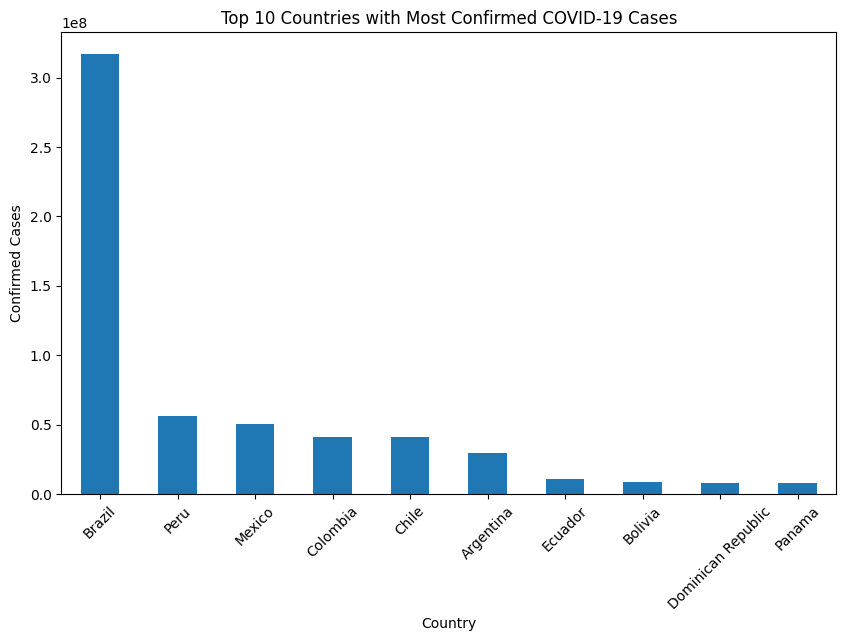

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# Load the CSV file
file_path = '/content/drive/My Drive/Colab Notebooks/messycovid.csv'
df = pd.read_csv(file_path)

# Clean data
# Convert 'Deaths' and 'Recovered' to numbers, fill missing with 0
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce').fillna(0)
df['Recovered'] = pd.to_numeric(df['Recovered'], errors='coerce').fillna(0)
df['Confirmed'].fillna(0, inplace=True)
df['Active'].fillna(0, inplace=True)

# Find top 10 countries by confirmed cases
top_countries = df.groupby('Country_Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries with Most Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

# Save cleaned data back to Drive
cleaned_file_path = '/content/drive/My Drive/Colab Notebooks/cleaned_messycovid.csv'
df.to_csv(cleaned_file_path, index=False)

